<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/FIFA_22_player_Clustering_using_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import clear_output
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/players_22.csv')

In [5]:
df.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [6]:
features = ['overall', 'potential', 'value_eur', 'wage_eur', 'age']
df = df.dropna(subset=features)

In [7]:
data = df[features].copy()
data.head()

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30


In [8]:
# appling above explanation to code.
data = (data - data.min()) / (data.max() - data.min()) * 9 + 1
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.131826,1.219443,4.063345
std,1.346635,1.191076,0.353229,0.501528,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.021620,1.012876,2.666667
50%,4.717391,5.304348,1.044817,1.064378,4.000000
75%,5.500000,6.086957,1.092370,1.193133,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [41]:
data.columns

Index(['overall', 'potential', 'value_eur', 'wage_eur', 'age'], dtype='object')

In [9]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [10]:
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
overall,4.326087,2.760870,3.543478,3.739130,4.326087
potential,5.108696,7.065217,5.695652,6.478261,6.282609
value_eur,1.055255,1.069173,1.203716,1.039017,1.014660
wage_eur,1.115880,1.010300,1.244635,1.012876,1.218884
age,2.333333,4.000000,3.000000,2.666667,4.666667


In [11]:
# applying above explanatin into code.
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [12]:
labels = get_labels(data, centroids)
labels.sample(3)

16016    2
13962    0
17890    2
dtype: int64

In [13]:
# getting new centroid using geometric centroid
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean()))

In [14]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components = 2)
    data_2d = pca.fit_transform(data)
    cenroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Itaration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=cenroids_2d[:,0] , y=cenroids_2d[:,1])
    plt.show()

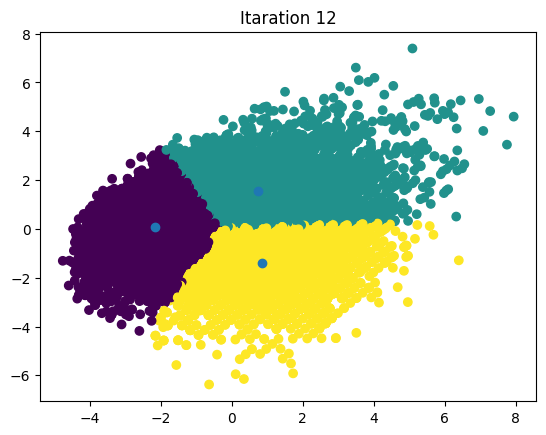

In [15]:
max_itr = 100
k = 3

centroids = random_centroids(data,k)
old_centroids = pd.DataFrame()
itr = 1
while itr < max_itr and not centroids.equals(old_centroids):
    old_centroids = centroids
    itr += 1
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, itr)

In [16]:
df[labels == 0][['short_name'] + features].head()

,short_name,overall,potential,value_eur,wage_eur,age
7025,Sandeiro Leal,68,68,1400000.0,7000.0,21
8028,Narcisso Mau,67,67,1100000.0,4000.0,21
8029,Botelhinonsa,67,67,1100000.0,4000.0,21
8030,Edenildo Lagoas,67,67,1100000.0,3000.0,21
8040,Dener Rolim,67,67,1200000.0,4000.0,21


## **Same task using Sklearn library**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from IPython.display import clear_output

In [69]:
# Load and preprocess the data
df = pd.read_csv('/content/players_22.csv')
features = ['overall', 'potential', 'value_eur', 'wage_eur', 'age']
df = df.dropna(subset=features)
data = df[features].copy()
scaler = MinMaxScaler(feature_range=(1, 10))
data_scaled = scaler.fit_transform(data)

In [70]:
# Define the number of clusters
k = 3

# Perform k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(data_scaled)
centroids = kmeans.cluster_centers_

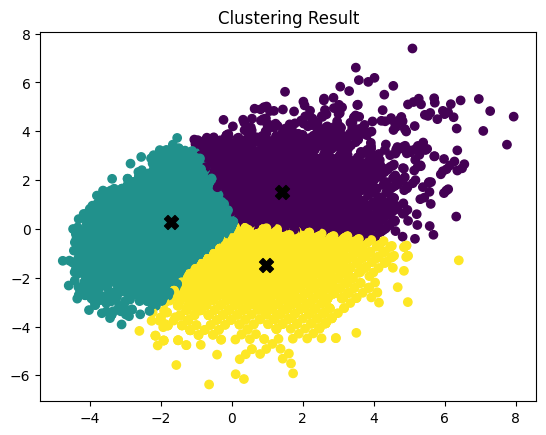

In [71]:
# Visualize the clusters
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)
centroids_2d = pca.transform(centroids)
clear_output(wait=True)
plt.title('Clustering Result')
plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels)
plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1], marker='X', s=100, c='black')
plt.show()

Explanation:

1. PCA (Principal Component Analysis) is applied to perform dimensionality reduction on the scaled data (data_scaled). By specifying n_components=2, we reduce the data to two dimensions for visualization purposes.

2. The fit_transform() method is used to fit the PCA model on the data and then transform it into the reduced two-dimensional space. This is stored in the data_2d variable.

3. Similarly, the centroids obtained from the k-means clustering are transformed into the two-dimensional space using the transform() method of the PCA model. The transformed centroids are stored in the centroids_2d variable.

4. The clear_output() function is used to clear any previous outputs, providing a clean plot.

5. The title for the plot is set as 'Clustering Result' using the plt.title() function.

6. The data points are plotted using the plt.scatter() function. The x-coordinates are taken from the first column of data_2d (data_2d[:, 0]), the y-coordinates from the second column (data_2d[:, 1]), and the colors are determined by the assigned cluster labels (labels). Each data point is colored according to its cluster label.

7. The centroids are also plotted as 'X' markers using the plt.scatter() function. The x-coordinates are taken from the first column of centroids_2d (centroids_2d[:, 0]), the y-coordinates from the second column (centroids_2d[:, 1]), the marker style is set to 'X', and the color is set to black.

8. Finally, the plot is displayed using plt.show().

This code generates a scatter plot where each data point is represented in the reduced two-dimensional space. The colors indicate the clusters assigned by k-means clustering, and the centroids are marked separately as 'X' markers in black.

Feel free to customize the plot's appearance, such as adding axis labels or modifying the title, to meet your specific requirements.